## Visión por Computadora 1

## Trabajo Práctico N° 1

### Grupo

| Autores               | E-mail                    | Nº SIU  |
|---------------------- |---------------------------|---------|
| Braian Desía          | b.desia@hotmail.com       | a1804   |
| Juan José Cardinali   | juanchijc@gmail.com       | a1809   |

#### LIBRERÍAS

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### PARTE 1:

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

2. Implementar el algoritmo de White Patch para librarnos de las diferencias de color de iluminación.

3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White Patch.

In [14]:
class img_pro():
    def __init__(self):
        self.img = None

    def read_img(self, img_path):
        self.img = cv.imread(img_path)

    def chromatic_coord(self):
        # Convierte la imagen a punto flotante
        img_float = self.img.astype(np.float32)

        # Normaliza canals
        norm_factor = np.sum(img_float, axis=2)

        # Avoid dividing by zero...
        norm_factor[norm_factor == 0] = 1

        img_chromatic = img_float / norm_factor[:, :, np.newaxis]

        return img_chromatic

    def white_patch(self):
        # Convierte la imagen a punto flotante
        img_float = self.img.astype(np.float32)
        
        # Calcula el factor de escala
        max_R = np.max(img_float[:,:,2])
        max_G = np.max(img_float[:,:,1])
        max_B = np.max(img_float[:,:,0])
        
        # Aplica el ajuste del balance de blancos (White Patch)
        img_float[:,:,2] = (img_float[:,:,2] / max_R) * 255
        img_float[:,:,1] = (img_float[:,:,1] / max_G) * 255
        img_float[:,:,0] = (img_float[:,:,0] / max_B) * 255
        
        # Convierte la imagen de vuelta a valores enteros
        img_white_patch = np.clip(img_float, 0, 255).astype(np.uint8)
        
        return img_white_patch
    
    

Aplicamos el algoritmo de coordenadas cromáticas:

In [15]:
# Definimos la lista de archivos a leer
imgs_to_read = []
for i in range(3):
    imgs_to_read.append('coord_cromaticas/CoordCrom_'+str(i+1)+'.png')

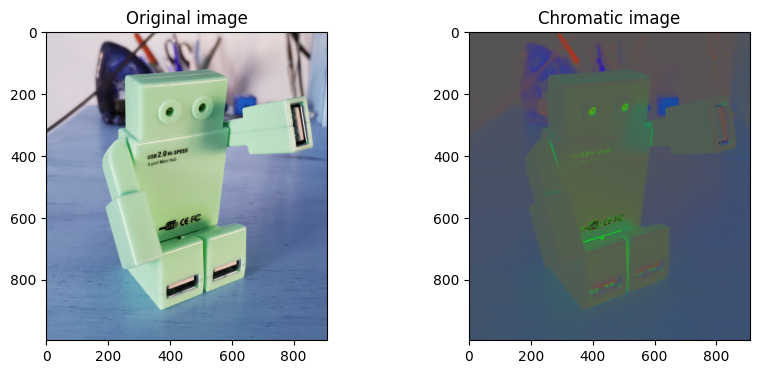

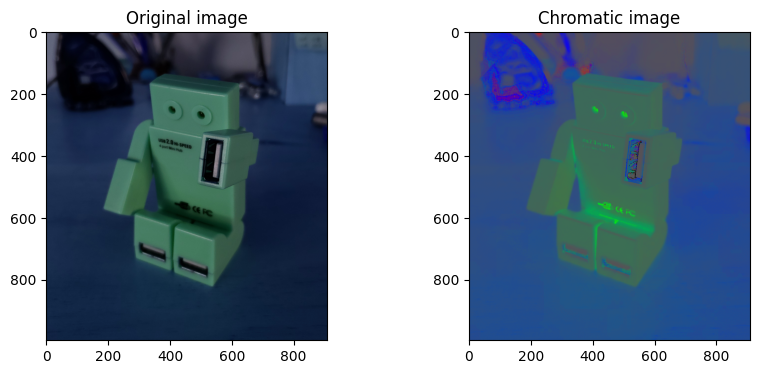

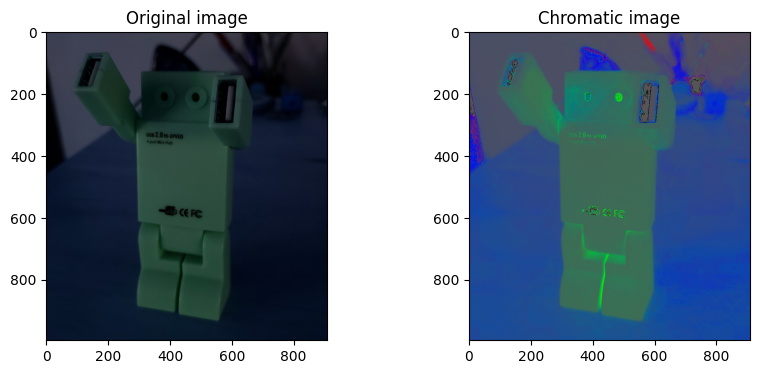

In [16]:
for img_path in imgs_to_read:

    img = img_pro()
    img.read_img(img_path)
    img_chromatic = img.chromatic_coord()

    # Display original and chromatic images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].imshow(img.img)
    axes[0].set_title('Original image')

    axes[1].imshow(img_chromatic)
    axes[1].set_title('Chromatic image')

    plt.show()

Aplicamos el algoritmo de White Patch:

In [17]:
imgs_to_read = ['white_patch/test_blue.png',
                'white_patch/test_green.png',
                'white_patch/test_red.png',
                'white_patch/wp_blue.jpg',
                'white_patch/wp_green.png',
                'white_patch/wp_green2.jpg',
                'white_patch/wp_red.png',
                'white_patch/wp_red2.jpg',
                ]

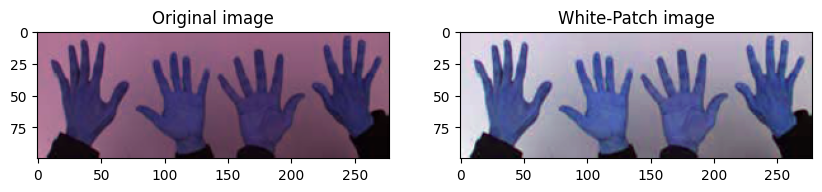

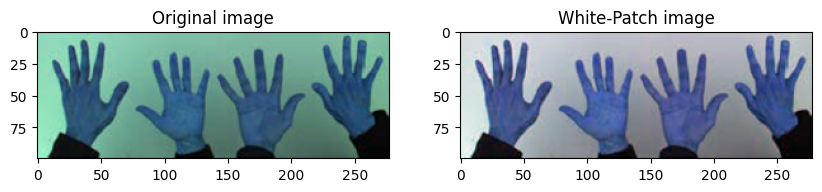

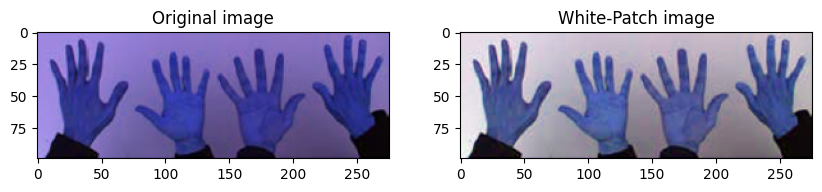

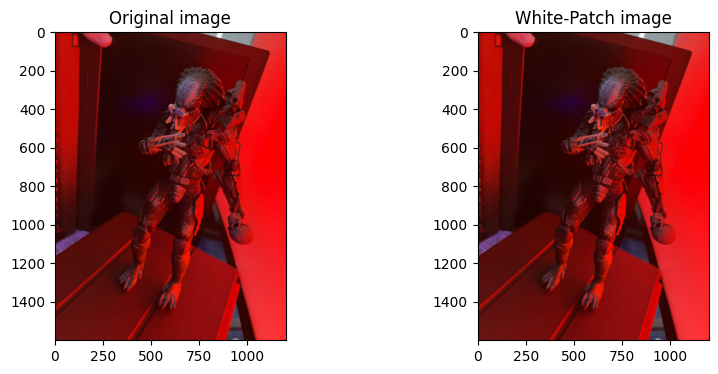

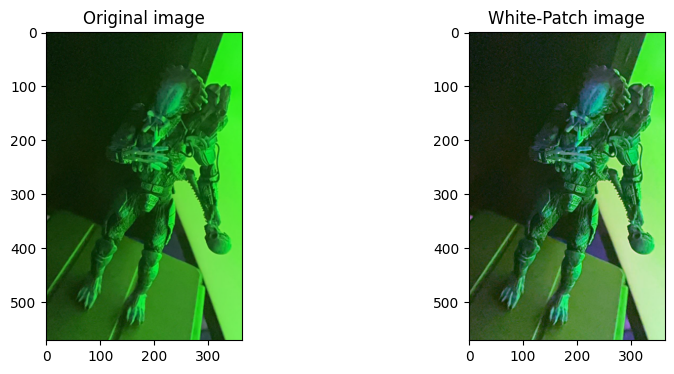

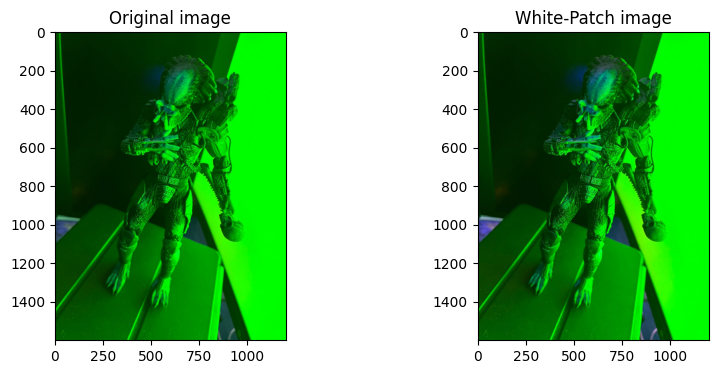

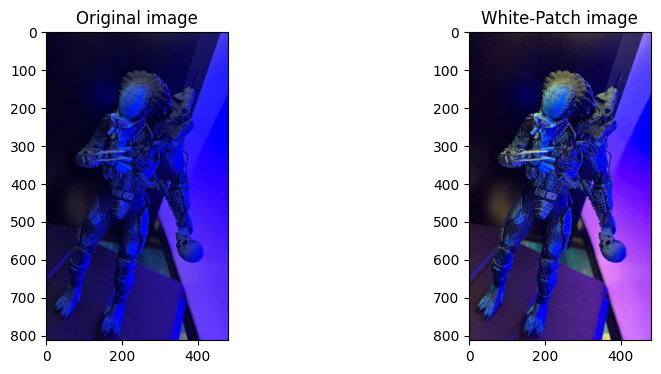

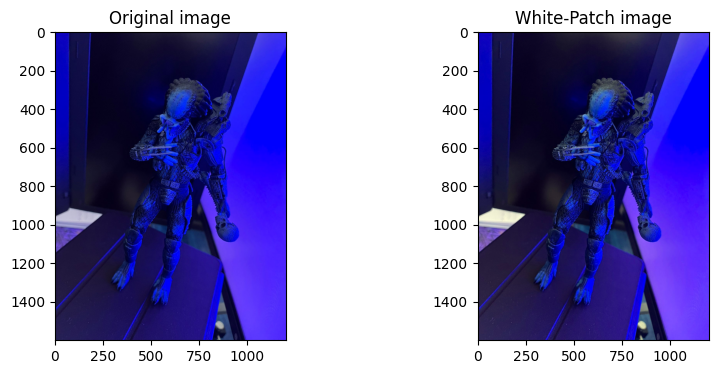

In [18]:
for img_path in imgs_to_read:

    img = img_pro()
    img.read_img(img_path)
    img_whitepatch = img.white_patch()

    # Display original and chromatic images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(img.img)
    axes[0].set_title('Original image')

    axes[1].imshow(img_whitepatch)
    axes[1].set_title('White-Patch image')

    plt.show()

### PARTE 2:

1. Para las imágenes img1_tp.png' y img2_tp.png, leerlas con OpenCV en escala de grisas y visualizarlas.

2. Elija un número de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasficicación/detección de imágenes, considera que puede ser de utilidad tomar como *feature* a los histogramas?

3. Para la imagen segmentacion.png, analice el histograma de los canales RGB. Segmente alguno de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando máscaras, las regiones en imágenes separadas.

Leemos las imagenes en escala de grises con OpenCV:

In [19]:
imgs_to_read = ['img1_tp.png',
                'img2_tp.png',
                ]

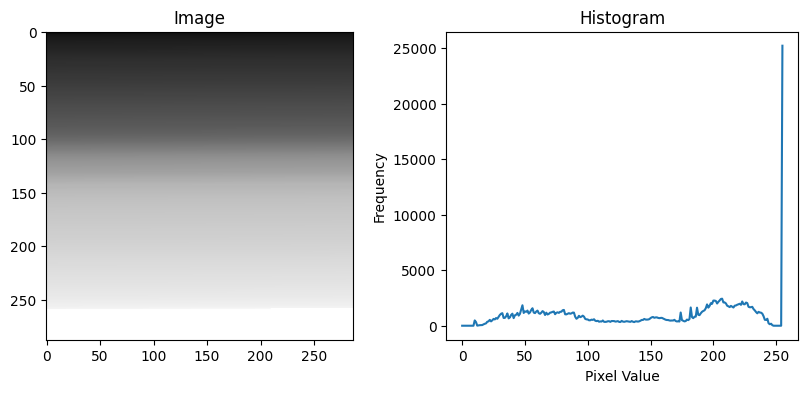

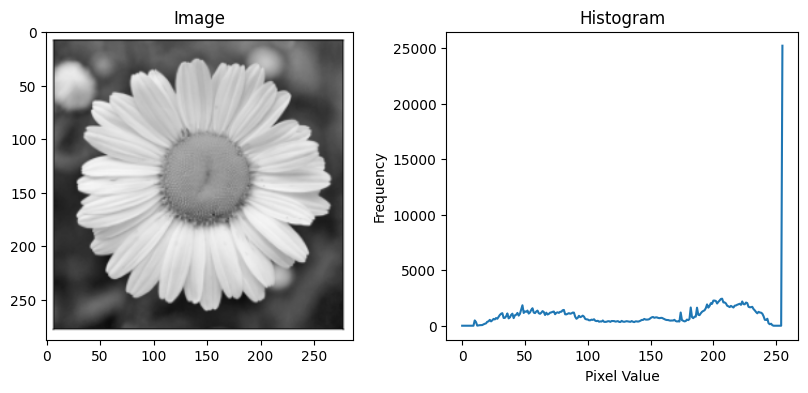

In [20]:
for img_file in imgs_to_read:
    img = cv.imread(img_file)

    hist, bins = np.histogram(img.ravel(), 256, [0, 256])
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Image')

    axes[1].plot(hist)
    axes[1].set_title('Histogram')
    axes[1].set_xlabel('Pixel Value')
    axes[1].set_ylabel('Frequency')


#### SEGMENTACIÓN

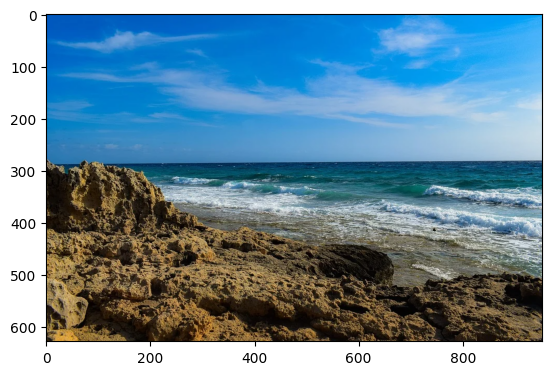

In [ ]:
imgBGR = cv.imread('segmentacion.png')

# Convertir la imagen a RGB
imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(imgRGB)
plt.show()

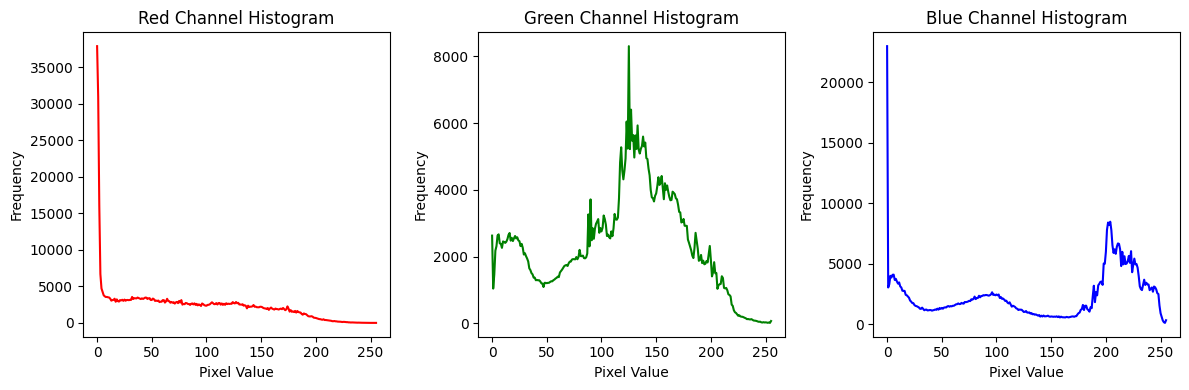

In [28]:
# Separar los canales de la imagen
r_channel = imgRGB[:,:,0]
g_channel = imgRGB[:,:,1]
b_channel = imgRGB[:,:,2]

# Calcular los histogramas para cada canal
r_hist = cv.calcHist([r_channel], [0], None, [256], [0, 256])
g_hist = cv.calcHist([g_channel], [0], None, [256], [0, 256])
b_hist = cv.calcHist([b_channel], [0], None, [256], [0, 256])

# Mostrar los histogramas por canal
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(r_hist, color='red')
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.plot(g_hist, color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.plot(b_hist, color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

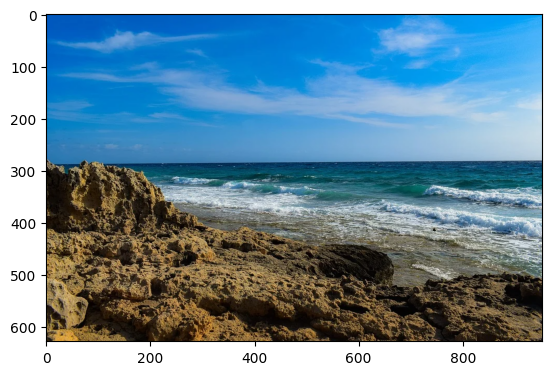

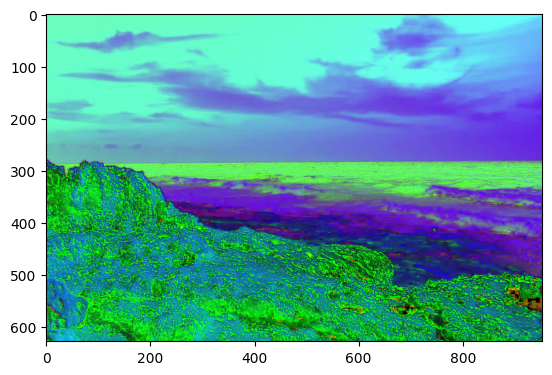

In [30]:
# Para segmentar, buscamos un espacio de color conveniente para la discriminación

# Convertir la imagen a RGB
imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)
plt.figure()
plt.imshow(imgRGB)
plt.show()

# Convertir la imagen a HSV
imgHSV = cv.cvtColor(imgBGR, cv.COLOR_BGR2HSV)
plt.figure()
plt.imshow(imgHSV)
plt.show()

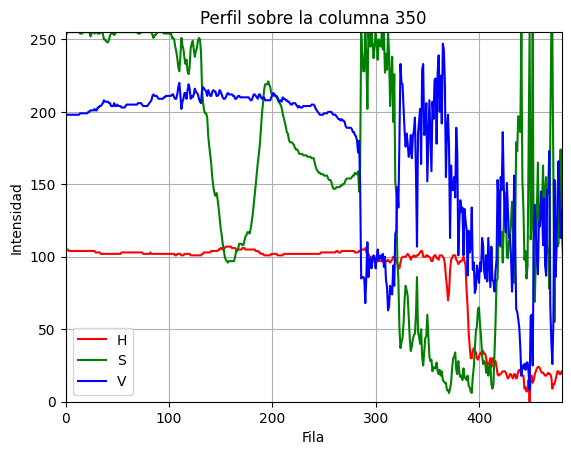

In [31]:

# Graficar los perfiles de intensidad de cada canal
plt.figure()
idx_col = 350
perfil_color = imgHSV[:, idx_col]
plt.plot(perfil_color[:,0], color='r',label='H')
plt.plot(perfil_color[:,1], color='g',label='S')
plt.plot(perfil_color[:,2], color='b',label='V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,480)
plt.ylim(0,255)
plt.legend()
plt.show()

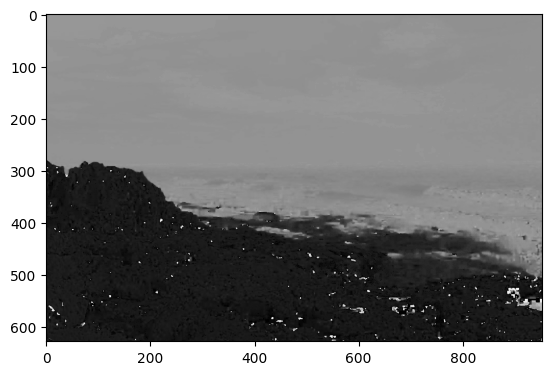

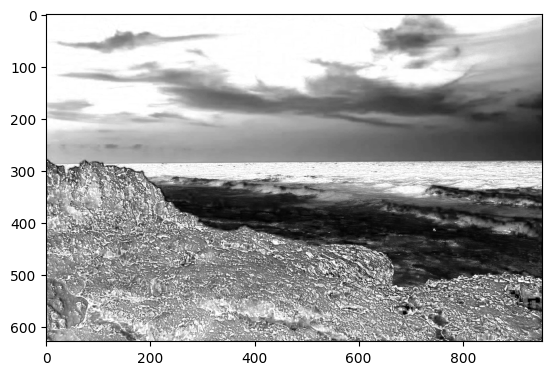

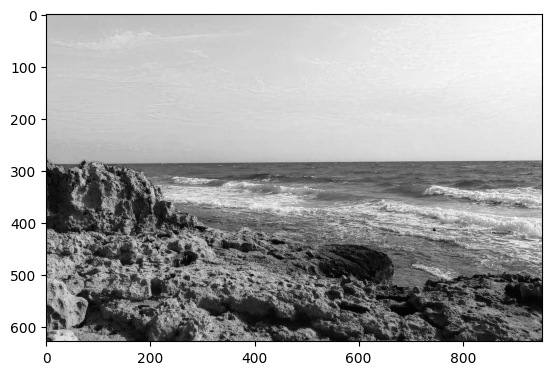

In [32]:
im_h, im_s, im_v = cv.split(imgHSV)
plt.figure()
# La curva de Hue, discrimina fácilmente el color del tablero de los colores del fondo
plt.imshow(im_h, cmap='gray')
plt.show()
plt.figure()
# Puedo complementar con la curva de saturación, ya que ambas son muy uniformes sobre el tablero
plt.imshow(im_s,cmap='gray')
plt.show()
plt.figure()
# La imagen de int}ensidad (V) permite discriminar fácilmente el bloque del tablero, pero confunde el tablero con el fondo
plt.imshow(im_v,cmap='gray')
plt.show()

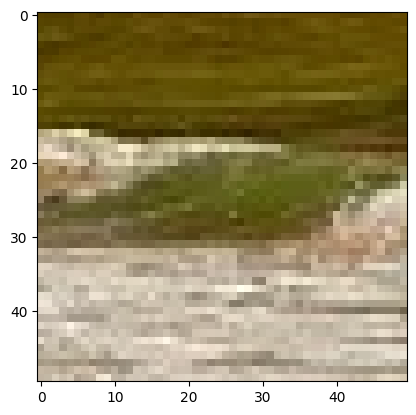

In [33]:
# Hacemos una descripcion estadistica
muestra = imgHSV[300:350, 300:350, :]

color_h_medio, _, _ = np.mean(muestra, axis=(0,1))

muestra = cv.cvtColor(muestra, cv.COLOR_HSV2BGR)
#muestra = cv.cvtColor(muestra, cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(muestra)
plt.show()

In [34]:
color_h_medio

98.188

hue medio:98.188


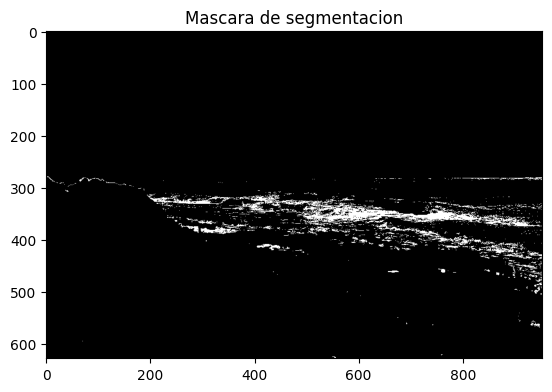

In [35]:
print(f'hue medio:{color_h_medio}')

color_l = (color_h_medio-10, 10, 10)
color_u = (color_h_medio+10, 150, 150)

mask = cv.inRange(imgHSV, color_l,  color_u)


plt.imshow(mask, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()

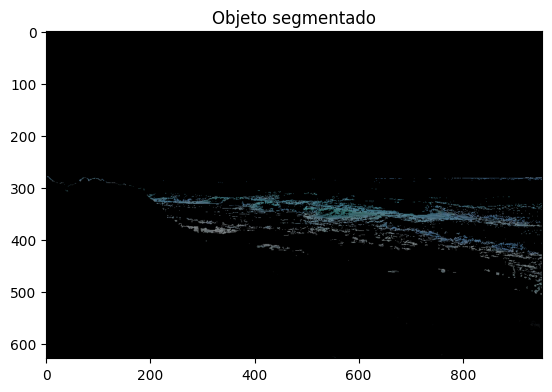

In [37]:
img_segmentada = cv.bitwise_and(imgBGR, imgBGR, mask=mask)
plt.imshow(img_segmentada[:,:,::-1])
plt.title('Objeto segmentado')
plt.show()